<a href="https://colab.research.google.com/github/vaishaliojha08-sys/FirstModel/blob/main/FirstModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X.shape, y.shape


((891, 11), (891,))

In [32]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = DummyClassifier(strategy='most_frequent')

baseline_model.fit(X_train,y_train)

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Dummy Classifier is: {accuracy:.4f}")

precision = precision_score(y_test,y_pred)
print(f"Precision for Dummy Classifier is: {precision:.4f}")

recall = recall_score(y_test,y_pred)
print(f"Recall for Dummy Classifier is: {recall:.4f}")






Accuracy for Dummy Classifier is: 0.5866
Precision for Dummy Classifier is: 0.0000
Recall for Dummy Classifier is: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isna().sum())

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [33]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc_logistic = accuracy_score(y_test, y_pred)
print(f"Accuracy for logistic regression is: {acc_logistic:.4f}")

precision_logistic = precision_score(y_test,y_pred)
print(f"Precision for Dummy Classifier is: {precision_logistic:.4f}")

recall_logistic = recall_score(y_test,y_pred)
print(f"Recall for Dummy Classifier is: {recall_logistic:.4f}")

Accuracy for logistic regression is: 0.8101
Precision for Dummy Classifier is: 0.7857
Recall for Dummy Classifier is: 0.7432


In [34]:
probabilities = model.predict_proba(X_test)[:,1]
y_pred_07 = (probabilities>=0.7).astype(int)

print(f"Accuracy at 0.7: {accuracy_score(y_test, y_pred_07):.4f}")
print(f"Precision at 0.7: {precision_score(y_test, y_pred_07):.4f}")
print(f"Recall at 0.7: {recall_score(y_test, y_pred_07):.4f}")

Accuracy at 0.7: 0.7989
Precision at 0.7: 0.9318
Recall at 0.7: 0.5541


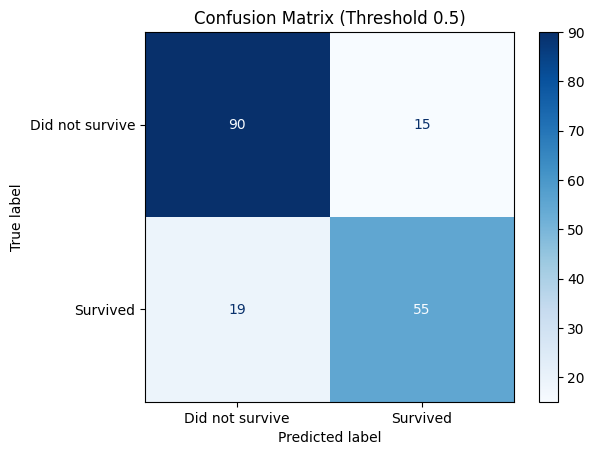

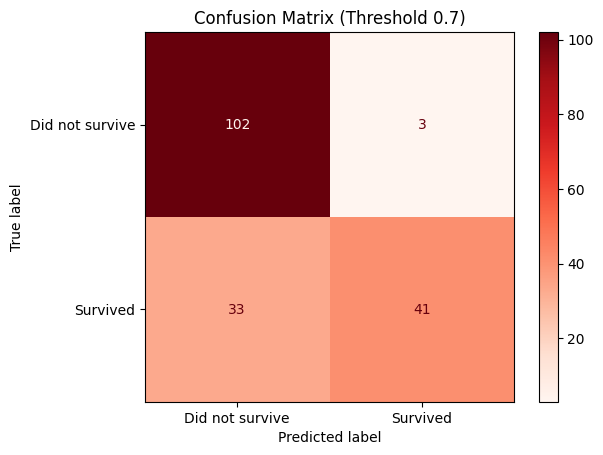

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_07 = confusion_matrix(y_test, y_pred_07)

display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels= ['Did not survive','Survived'])
display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Threshold 0.5)')
plt.show()


display_07 = ConfusionMatrixDisplay(confusion_matrix=cm_07,
                                 display_labels= ['Did not survive','Survived'])
display_07.plot(cmap=plt.cm.Reds)

plt.title('Confusion Matrix (Threshold 0.7)')
plt.show()